# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('train.csv')
df.head(25)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [10]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


<Figure size 1296x576 with 0 Axes>

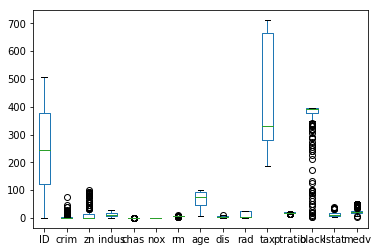

In [44]:
plt.figure(figsize = (18,8))
df.plot(kind = "box")

In [11]:
#summary statistics for crim
print(df['crim'].std())
print(df['crim'].mean())
print(df['crim'].quantile(.5))
print(df['crim'].mode())

7.352271836781107
3.360341471471471
0.26169000000000003
0    0.01501
dtype: float64


In [12]:
#summary statistics for tax (property-tax rate per $10,000)
print(df['tax'].std())
print(df['tax'].mean())
print(df['tax'].quantile(.5))
print(df['tax'].mode())

170.84198846058234
409.27927927927925
330.0
0    666
dtype: int64


In [13]:
#summary statistics for tax (property-tax rate per $10,000)
print(df['age'].std())
print(df['age'].mean())
print(df['age'].quantile(.5))
print(df['age'].mode())

28.13334360562339
68.22642642642643
76.7
0    100.0
dtype: float64


In [101]:
#create sub dataset
data = pd.DataFrame ({'crim' : df['crim'],'tax' : df['tax'], 'age' : df['age'],'medv' : df['medv']})
data.head()
type(data)

pandas.core.frame.DataFrame

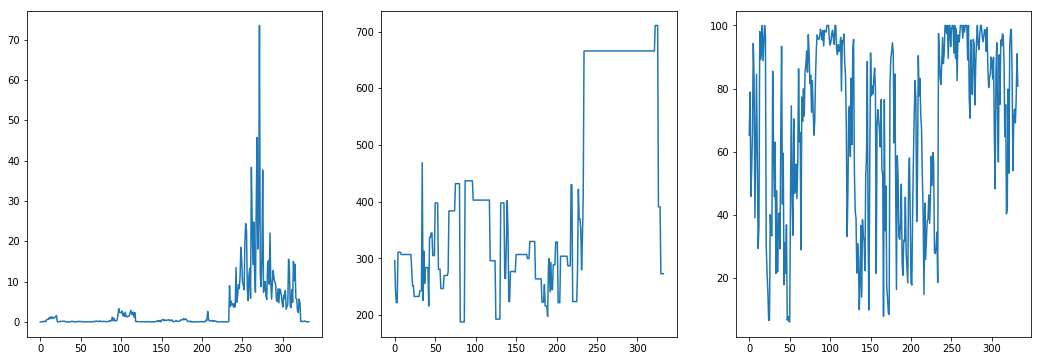

In [102]:
crime = df['crim']
tax = df['tax']
age = df['age']
medv = df['medv']

fig = plt.figure(figsize = (18,6))
ax1 = fig.add_subplot (1,3,1)
ax2 = fig.add_subplot (1,3,2)
ax3 = fig.add_subplot (1,3,3)

ax1.plot (crime)
ax2.plot (tax)
ax3.plot (age)

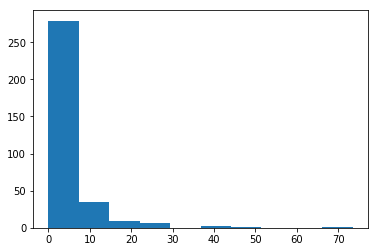

In [17]:
plt.hist (crime,bins = 10)
plt.show()

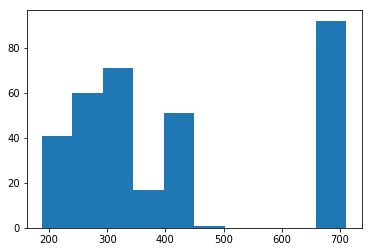

In [18]:
plt.hist (tax,bins = 10)
plt.show()

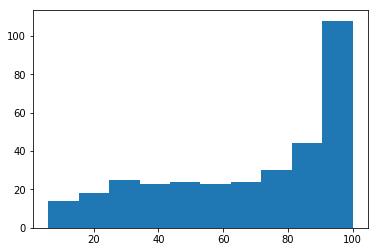

In [19]:
plt.hist(age, bins = 10)
plt.show()

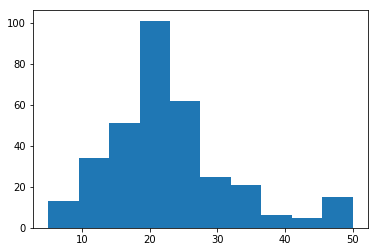

In [100]:
plt.hist(medv, bins = 10)
plt.show()

In [104]:
data.describe()

,crim,tax,age,medv
count,333.000000,333.000000,333.000000,333.000000
mean,3.360341,409.279279,68.226426,22.768769
std,7.352272,170.841988,28.133344,9.173468
min,0.006320,188.000000,6.000000,5.000000
25%,0.078960,279.000000,45.400000,17.400000
50%,0.261690,330.000000,76.700000,21.600000
75%,3.678220,666.000000,93.800000,25.000000
max,73.534100,711.000000,100.000000,50.000000


In [103]:
# crime vs. property tax value ( <500 vs. >500)
crimevtax = data
crimevtax['taxval'] = crimevtax['tax'] > 500
#crimevtax.head(10)
crimevtax


,crim,tax,age,medv,taxval
0,0.00632,296,65.2,24.0,False
1,0.02731,242,78.9,21.6,False
2,0.03237,222,45.8,33.4,False
3,0.06905,222,54.2,36.2,False
4,0.08829,311,66.6,22.9,False
5,0.22489,311,94.3,15.0,False
6,0.11747,311,82.9,18.9,False
7,0.09378,311,39.0,21.7,False
8,0.62976,307,61.8,20.4,False
9,0.63796,307,84.5,18.2,False


,crim,tax,age
taxval,,,
False,0.136420,304,62.0
True,8.224335,666,94.1


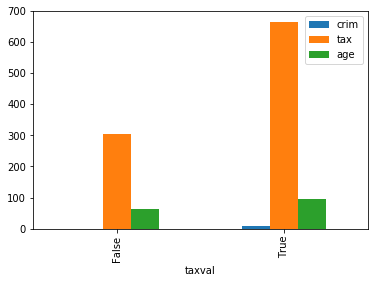

In [39]:
meancrimevtax = crimevtax.groupby('taxval').median()
meancrimevtax.plot (kind = 'bar')
meancrimevtax.head()

#Interestingly enough, there is more crime in "richer" neighborhoods than "poorer" neighborhoods. 
#I would've thought the exact opposite. 
#Richer areas have older buildings which makes sense

Text(0.5, 1.0, 'Property Tax vs. Median Value of Homes')

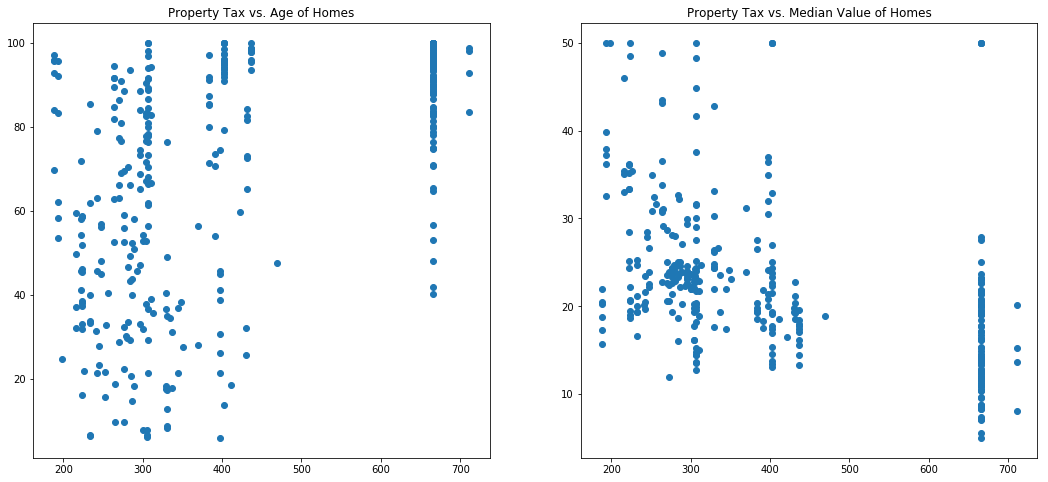

In [110]:
#tax value vs. age value
fig = plt.figure(figsize = (18,8))
ax1 = fig.add_subplot (121)
ax2 = fig.add_subplot (122)
ax1.scatter(data['tax'],data['age'])
ax2.scatter(data['tax'],data['medv'])

#oldest homes are taxed the highest

ax1.set_title ('Property Tax vs. Age of Homes')
ax2.set_title ('Property Tax vs. Median Value of Homes')

#oldest homes are taxed the highest
#most valued homes are necessarily taxed the highest

In [48]:
#proportion of blacks vs. distance to five Boston employment centers

blackdistance = pd.DataFrame({'black':df['black'], 'dis' : df['dis']})
blackdistance.head()

,black,dis
0,396.90,4.0900
1,396.90,4.9671
2,394.63,6.0622
3,396.90,6.0622
4,395.60,5.5605


In [49]:
blackdistance.describe()

,black,dis
count,333.000000,333.000000
mean,359.466096,3.709934
std,86.584567,1.981123
min,3.500000,1.129600
25%,376.730000,2.122400
50%,392.050000,3.092300
75%,396.240000,5.116700
max,396.900000,10.710300


In [73]:
blackdistance ['notblack'] = blackdistance['black'] < blackdistance ['black'].quantile(.25)
blackdistance ['far'] = blackdistance['dis'] > blackdistance ['dis'].quantile(.75)
blackdistance
#blackdistance.plot.scatter('black','dis')

,black,dis,far,notblack
0,396.90,4.0900,False,False
1,396.90,4.9671,False,False
2,394.63,6.0622,True,False
3,396.90,6.0622,True,False
4,395.60,5.5605,True,False
5,392.52,6.3467,True,False
6,396.90,6.2267,True,False
7,390.50,5.4509,True,False
8,396.90,4.7075,False,False
9,380.02,4.4619,False,False


(0, 12)

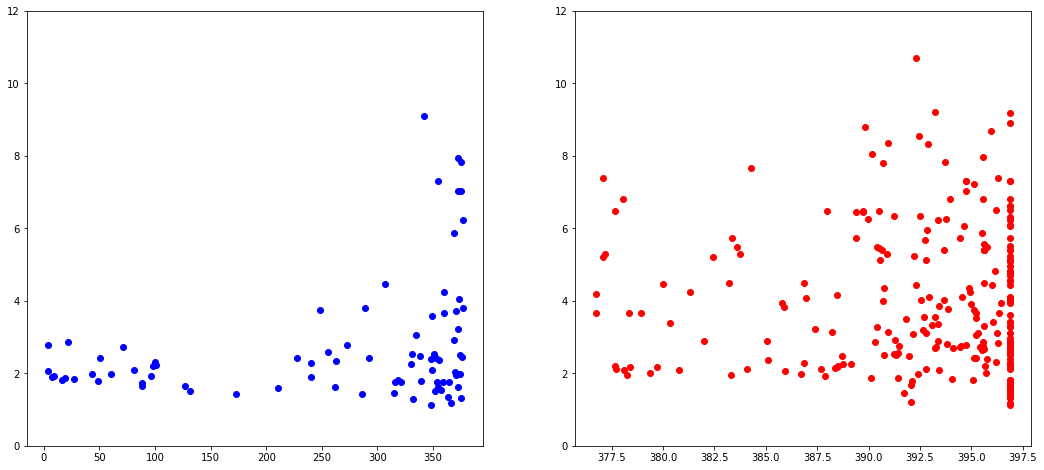

In [72]:
fig = plt.figure (figsize = (18,8))
ax1 = fig.add_subplot (121)
ax2 = fig.add_subplot (122)
noblackx = blackdistance.loc[blackdistance['notblack']==True,'black']
noblacky = blackdistance.loc[blackdistance['notblack']==True,'dis']
blackx = blackdistance.loc[blackdistance['notblack']==False,'black']
blacky = blackdistance.loc[blackdistance['notblack']==False,'dis']

ax1.scatter(noblackx,noblacky,color = 'blue')
ax2.scatter(blackx,blacky,color = 'red')
ax1.set_ylim(0,12)
ax2.set_ylim(0,12)


Text(0.5, 1.0, 'Distance from Boston (top 25%) vs. Proportion of Blacks')

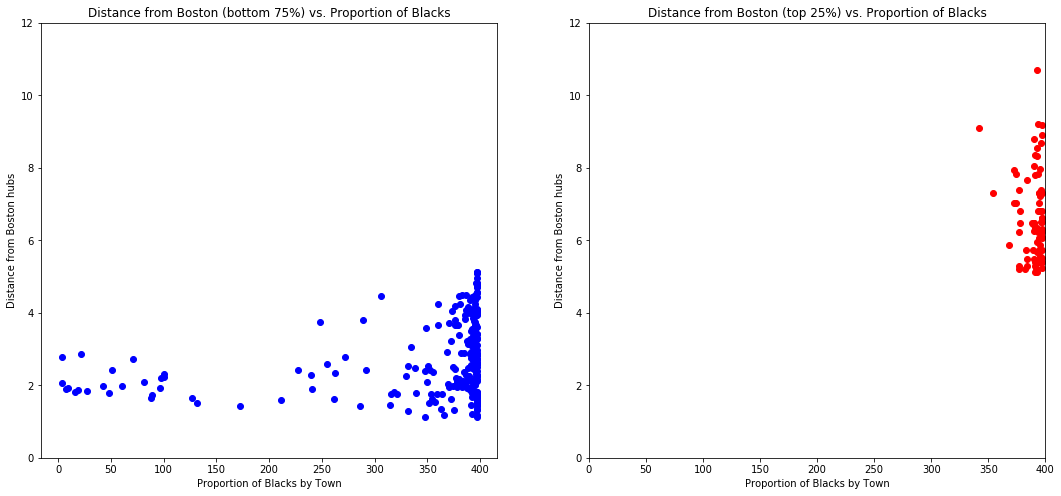

In [78]:
fig = plt.figure (figsize = (18,8))
ax1 = fig.add_subplot (121)
ax2 = fig.add_subplot (122)
farx = blackdistance.loc[blackdistance['far']==True,'black']
fary = blackdistance.loc[blackdistance['far']==True,'dis']
nonfarx = blackdistance.loc[blackdistance['far']==False,'black']
nonfary = blackdistance.loc[blackdistance['far']==False,'dis']

ax1.scatter(nonfarx,nonfary,color = 'blue')
ax2.scatter(farx,fary,color = 'red')
ax1.set_ylim(0,12)
ax2.set_ylim(0,12)
ax2.set_xlim (0,400)

ax1.set_xlabel ('Proportion of Blacks by Town')
ax1.set_ylabel ('Distance from Boston hubs')
ax1.set_title ('Distance from Boston (bottom 75%) vs. Proportion of Blacks')
ax2.set_xlabel ('Proportion of Blacks by Town')
ax2.set_ylabel ('Distance from Boston hubs')
ax2.set_title ('Distance from Boston (top 25%) vs. Proportion of Blacks')

#All cities that are in the top 25% percentile in distance from Boston are predominantly black-neighborhoods
#All cities that are low in proportion of blacks are in contrast - very close to Boston

In [82]:
#crime vs. teachers vs. status of the population
tvcrim = pd.DataFrame({'crim':df['crim'], 'ptratio' : df['ptratio'],'lstat' : df['lstat'] })
tvcrim.head()

,crim,ptratio,lstat
0,0.00632,15.3,4.98
1,0.02731,17.8,9.14
2,0.03237,18.7,2.94
3,0.06905,18.7,5.33
4,0.08829,15.2,12.43


In [83]:
tvcrim.describe()

,crim,ptratio,lstat
count,333.000000,333.000000,333.000000
mean,3.360341,18.448048,12.515435
std,7.352272,2.151821,7.067781
min,0.006320,12.600000,1.730000
25%,0.078960,17.400000,7.180000
50%,0.261690,19.000000,10.970000
75%,3.678220,20.200000,16.420000
max,73.534100,21.200000,37.970000


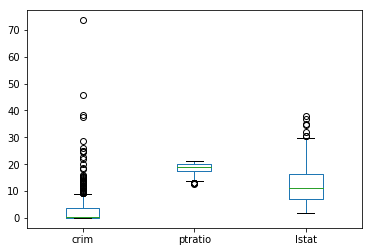

In [85]:
tvcrim.plot.box()

In [91]:
tvcrim['crimout'] = tvcrim['crim']>=10         #crime outliers
tvcrim.tail()

tvcrim_norm = tvcrim.loc[tvcrim['crimout'] ==False]
tvcrim_out = tvcrim.loc[tvcrim['crimout'] ==True]

tvcrim_norm.describe()

,crim,ptratio,lstat
count,300.000000,300.000000,300.000000
mean,1.479874,18.255333,11.335567
std,2.532699,2.182970,6.024596
min,0.006320,12.600000,1.730000
25%,0.069035,16.800000,6.657500
50%,0.200735,18.600000,10.175000
75%,1.416643,20.200000,14.722500
max,9.966540,21.200000,34.410000


In [92]:
tvcrim_out.describe()

,crim,ptratio,lstat
count,33.000000,33.0,33.000000
mean,20.455503,20.2,23.241515
std,12.898264,0.0,6.887266
min,10.062300,20.2,12.130000
25%,13.075100,20.2,18.130000
50%,15.288000,20.2,23.240000
75%,24.393800,20.2,26.770000
max,73.534100,20.2,37.970000


Text(0.5, 1.0, 'Top 10% of Cities in Crime')

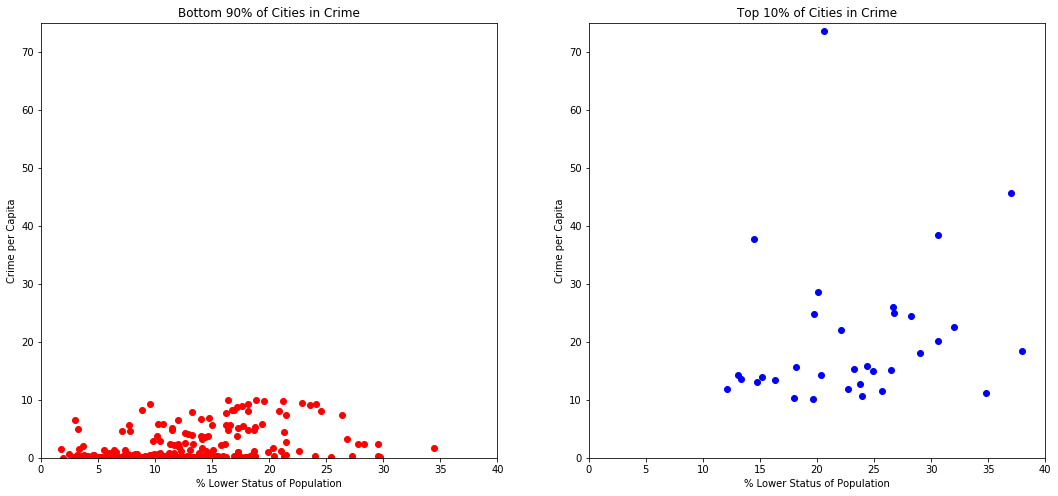

In [97]:
fig = plt.figure (figsize = (18,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(tvcrim_norm['lstat'],tvcrim_norm['crim'],color = 'red')
ax2.scatter(tvcrim_out['lstat'],tvcrim_out['crim'],color = 'blue')

ax1.set_xlim(0,40)
ax2.set_xlim(0,40)
ax1.set_ylim(0,75)
ax2.set_ylim(0,75)


ax1.set_xlabel ('% Lower Status of Population')
ax2.set_xlabel ('% Lower Status of Population')
ax1.set_ylabel ('Crime per Capita')
ax2.set_ylabel ('Crime per Capita')
ax1.set_title ('Bottom 90% of Cities in Crime')
ax2.set_title ('Top 10% of Cities in Crime')

#Understandably, the top 10% of cities with Crime have higher percentages of lower status in the population

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!